# Import stock price and earnings information from IEX, a financial markets exchange 

 
#### Goal:  How impactul an earnings "miss" or "beat" is on stock price and volume.

## Setup Notebook, Input Stock Symbol


In [1]:
import requests
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
symbol = input('enter symbol: ')
rng = input('enter range: ')

enter symbol: TSLA
enter range: 1Y


### API for Price Data

Daily Price data per stock and date range

In [3]:
#Price Info and can specify range
endpoint = 'https://api.iextrading.com/1.0/stock/%s/chart/%s' % (symbol, rng)
headers = {"Content-Type":"application/json"}

response_p = requests.get(endpoint, headers=headers)
response_json_p = response_p.json()
df_price = pd.DataFrame(response_json_p)


In [4]:
df_price

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,7.100,0.000000,2.088,347.160,2018-01-17,349.0000,"Jan 17, 18",339.7500,340.4700,7103505,7103505,345.6855
1,-2.590,-0.007461,-0.746,344.570,2018-01-18,352.3000,"Jan 18, 18",343.7400,345.6700,5685845,5685845,348.4553
2,5.450,0.008238,1.582,350.020,2018-01-19,350.5899,"Jan 19, 18",342.6000,345.0000,4888303,4888303,347.0233
3,1.540,0.012674,0.440,351.560,2018-01-22,357.8300,"Jan 22, 18",349.2000,349.4000,6210360,6210360,353.9844
4,1.230,0.016217,0.350,352.790,2018-01-23,360.5000,"Jan 23, 18",351.0000,360.0000,5465414,5465414,354.6571
5,-6.900,-0.003658,-1.956,345.890,2018-01-24,354.7500,"Jan 24, 18",343.5200,354.5800,5287478,5287478,348.2770
6,-8.250,-0.027423,-2.385,337.640,2018-01-25,349.2000,"Jan 25, 18",336.4000,348.2700,6740303,6740303,341.7126
7,5.210,-0.012415,1.543,342.850,2018-01-26,344.0000,"Jan 26, 18",335.7100,341.5000,4539356,4539356,340.3896
8,6.680,0.006827,1.948,349.530,2018-01-29,350.8500,"Jan 29, 18",338.2800,339.8500,4747149,4747149,345.7928
9,-3.710,-0.003860,-1.061,345.820,2018-01-30,348.2700,"Jan 30, 18",342.1700,345.1400,4717700,4717700,345.8373


### API for Earnings Data

In [5]:
#Earnings Info, previous four quarters
endpoint = 'https://api.iextrading.com/1.0/stock/%s/earnings' % (symbol)
headers = {"Content-Type":"application/json"}

response_e = requests.get(endpoint, headers=headers)
response_json_e = response_e.json()
df_earn = pd.DataFrame(response_json_e)
df_earn

,earnings,symbol
0,"{'actualEPS': 1.75, 'consensusEPS': -1.77, 'es...",TSLA
1,"{'actualEPS': -4.22, 'consensusEPS': -3.73, 'e...",TSLA
2,"{'actualEPS': -4.19, 'consensusEPS': -4.45, 'e...",TSLA
3,"{'actualEPS': -3.84, 'consensusEPS': -3.75, 'e...",TSLA


### Unpack JSON of Earnings data

In [6]:
# Example Call
earnings = pd.DataFrame.from_dict(df_earn['earnings'])
s = earnings.loc[1]
s[0]

{'EPSReportDate': '2018-08-01',
 'EPSSurpriseDollar': -0.49,
 'actualEPS': -4.22,
 'announceTime': 'AMC',
 'consensusEPS': -3.73,
 'estimatedChangePercent': -0.8284313725490196,
 'estimatedEPS': -3.73,
 'fiscalEndDate': '2018-06-30',
 'fiscalPeriod': 'Q2 2018',
 'numberOfEstimates': 2,
 'symbolId': 6924,
 'yearAgo': -2.04,
 'yearAgoChangePercent': -1.068627450980392}

In [7]:
#EPSSurpriseDollar is equivalent to actualEPS minus consensusEPS
df_earn['earnings'].loc[0]['EPSSurpriseDollar']

3.52

In [8]:
#EPS Report Date
df_earn['earnings'].loc[0]['EPSReportDate']

'2018-10-24'

In [9]:
#AnnounceTime Symbols`
#BTO (Before open), DMT (During trading), AMC (After close)
df_earn['earnings'].loc[0]['announceTime']

'AMC'

In [10]:
df_earn['eps_surprise_dollar'] = df_earn['earnings'].apply(lambda x: x['EPSSurpriseDollar'])
df_earn['announte_Time'] = df_earn['earnings'].apply(lambda x: x['announceTime'])
df_earn['eps_report_date'] = df_earn['earnings'].apply(lambda x: x['EPSReportDate'])
df_earn

,earnings,symbol,eps_surprise_dollar,announte_Time,eps_report_date
0,"{'actualEPS': 1.75, 'consensusEPS': -1.77, 'es...",TSLA,3.52,AMC,2018-10-24
1,"{'actualEPS': -4.22, 'consensusEPS': -3.73, 'e...",TSLA,-0.49,AMC,2018-08-01
2,"{'actualEPS': -4.19, 'consensusEPS': -4.45, 'e...",TSLA,0.26,AMC,2018-05-02
3,"{'actualEPS': -3.84, 'consensusEPS': -3.75, 'e...",TSLA,-0.09,AMC,2018-02-07


## Positive or Negative Earnings Surprise
 Beat = Positive Surprise
 
 Miss = Negative Surprise

In [12]:
def EarningsBeat():
    earnings_beat = []
    for x in df_earn['eps_surprise_dollar']:
        if x > 0:
            earnings_beat.append('beat')
        else:
            earnings_beat.append('miss')
    df_earn["earnings_beat"] = earnings_beat

In [13]:
EarningsBeat()

In [14]:
df_earn

,earnings,symbol,eps_surprise_dollar,announte_Time,eps_report_date,earnings_beat
0,"{'actualEPS': 1.75, 'consensusEPS': -1.77, 'es...",TSLA,3.52,AMC,2018-10-24,beat
1,"{'actualEPS': -4.22, 'consensusEPS': -3.73, 'e...",TSLA,-0.49,AMC,2018-08-01,miss
2,"{'actualEPS': -4.19, 'consensusEPS': -4.45, 'e...",TSLA,0.26,AMC,2018-05-02,beat
3,"{'actualEPS': -3.84, 'consensusEPS': -3.75, 'e...",TSLA,-0.09,AMC,2018-02-07,miss


#### Convert eps_report_date to a date type object and add column for day after earnings

In [16]:
import datetime

In [42]:
df_earn.eps_report_date = pd.to_datetime(df_earn.eps_report_date)[:5]
df_earn.eps_report_date.dtype

dtype('<M8[ns]')

In [43]:
df_earn["date"] = df_earn.eps_report_date.map(lambda x: x+ datetime.timedelta(1))

In [44]:
df_earn.head(5)

,earnings,symbol,eps_surprise_dollar,announte_Time,eps_report_date,earnings_beat,new_date,date
0,"{'actualEPS': 1.75, 'consensusEPS': -1.77, 'es...",TSLA,3.52,AMC,2018-10-24,beat,2018-10-25,2018-10-25
1,"{'actualEPS': -4.22, 'consensusEPS': -3.73, 'e...",TSLA,-0.49,AMC,2018-08-01,miss,2018-08-02,2018-08-02
2,"{'actualEPS': -4.19, 'consensusEPS': -4.45, 'e...",TSLA,0.26,AMC,2018-05-02,beat,2018-05-03,2018-05-03
3,"{'actualEPS': -3.84, 'consensusEPS': -3.75, 'e...",TSLA,-0.09,AMC,2018-02-07,miss,2018-02-08,2018-02-08


In [45]:
df_earn["date"].loc[0]

Timestamp('2018-10-25 00:00:00')

In [46]:
df_earn.eps_report_date[:1] + datetime.timedelta(1)

0   2018-10-25
Name: eps_report_date, dtype: datetime64[ns]

In [47]:
df_price['date'] = pd.to_datetime(df_price['date'])

### Make a joined dataframe

In [56]:
#df_price["eps_surprise_dollar"] = 
results = df_price.merge(df_earn[['date','eps_surprise_dollar','earnings_beat']], on='date', how ='left' )
results

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,day_price_range,volume_in_m,eps_surprise_dollar,earnings_beat
0,7.100,0.000000,2.088,347.160,2018-01-17,349.0000,"Jan 17, 18",339.7500,340.4700,7103505,7103505,345.6855,9.2500,7.103505,NaN,NaN
1,-2.590,-0.007461,-0.746,344.570,2018-01-18,352.3000,"Jan 18, 18",343.7400,345.6700,5685845,5685845,348.4553,8.5600,5.685845,NaN,NaN
2,5.450,0.008238,1.582,350.020,2018-01-19,350.5899,"Jan 19, 18",342.6000,345.0000,4888303,4888303,347.0233,7.9899,4.888303,NaN,NaN
3,1.540,0.012674,0.440,351.560,2018-01-22,357.8300,"Jan 22, 18",349.2000,349.4000,6210360,6210360,353.9844,8.6300,6.210360,NaN,NaN
4,1.230,0.016217,0.350,352.790,2018-01-23,360.5000,"Jan 23, 18",351.0000,360.0000,5465414,5465414,354.6571,9.5000,5.465414,NaN,NaN
5,-6.900,-0.003658,-1.956,345.890,2018-01-24,354.7500,"Jan 24, 18",343.5200,354.5800,5287478,5287478,348.2770,11.2300,5.287478,NaN,NaN
6,-8.250,-0.027423,-2.385,337.640,2018-01-25,349.2000,"Jan 25, 18",336.4000,348.2700,6740303,6740303,341.7126,12.8000,6.740303,NaN,NaN
7,5.210,-0.012415,1.543,342.850,2018-01-26,344.0000,"Jan 26, 18",335.7100,341.5000,4539356,4539356,340.3896,8.2900,4.539356,NaN,NaN
8,6.680,0.006827,1.948,349.530,2018-01-29,350.8500,"Jan 29, 18",338.2800,339.8500,4747149,4747149,345.7928,12.5700,4.747149,NaN,NaN
9,-3.710,-0.003860,-1.061,345.820,2018-01-30,348.2700,"Jan 30, 18",342.1700,345.1400,4717700,4717700,345.8373,6.1000,4.717700,NaN,NaN


### Reference Dataframe for Earnings Date

In [88]:
results_earnings = results[(results['earnings_beat'] == results['earnings_beat'])] 
results_earnings

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,day_price_range,volume_in_m,eps_surprise_dollar,earnings_beat
16,-29.77,-0.091975,-8.629,315.23,2018-02-08,348.62,"Feb 8, 18",314.60,343.31,10314573,10314573,328.8457,34.02,10.314573,-0.09,miss
74,-16.70,-0.180637,-5.545,284.45,2018-05-03,288.04,"May 3, 18",275.23,278.79,17352130,17352130,280.9083,12.81,17.352130,0.26,beat
137,48.70,0.006856,16.188,349.54,2018-08-02,349.99,"Aug 2, 18",323.16,328.44,23214962,23214962,336.1573,26.83,23.214962,-0.49,miss
196,26.36,-0.093041,9.137,314.86,2018-10-25,321.00,"Oct 25, 18",301.01,317.22,20840724,20840724,310.9500,19.99,20.840724,3.52,beat


### Trading Volume Stats

In [30]:
df_price['volume_in_m'] = df_price['volume'] / 1000000
d_volume_range = df_price['volume_in_m'].describe()
pd.DataFrame(d_volume_range)

,volume_in_m
count,254.000000
mean,8.661258
std,5.001788
min,3.080724
25%,5.625140
50%,7.203798
75%,9.471075
max,33.649694


### Price Change Stats

In [31]:
d_price_range = df_price['day_price_range'].describe()
pd.DataFrame(d_price_range)

,day_price_range
count,254.000000
mean,13.230524
std,6.136624
min,4.030000
25%,9.250000
50%,11.944450
75%,15.857500
max,48.309900


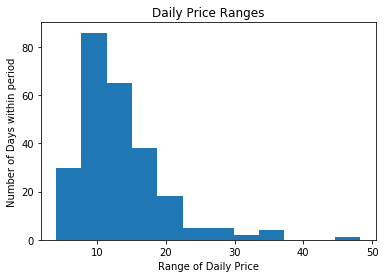

In [32]:
z = df_price['day_price_range']
plt.hist(z, bins=12)
plt.xlabel('Range of Daily Price')
plt.ylabel('Number of Days within period')
plt.title('Daily Price Ranges')
plt.show()

## Price Change Distribution Stats and Graphs

In [33]:
day_change_stats = df_price['changePercent'].describe()
pd.DataFrame(day_change_stats)

,changePercent
count,254.000000
mean,0.025024
std,3.807003
min,-13.902000
25%,-2.117250
50%,-0.154000
75%,1.920000
max,17.347000


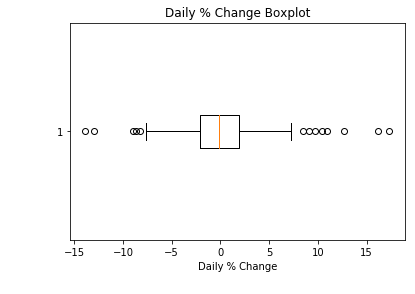

In [84]:
y = df_price['changePercent']

plt.boxplot(y, vert=False)
plt.xlabel('Daily % Change')
plt.title('Daily % Change Boxplot')
plt.show()

## Distribution of daily percentages in period

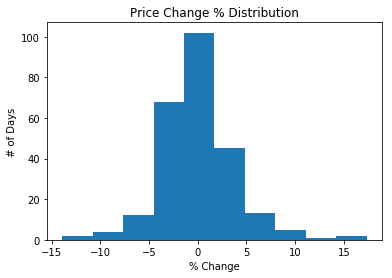

In [35]:
x = df_price['changePercent']

#Plot the distogram with hist() function
plt.hist(x, bins = 10)

plt.xlabel('% Change')
plt.ylabel('# of Days')
plt.title('Price Change % Distribution')
plt.show()

## Main Chart: Scatterplot of Daily Price Change % to Volume

Labeled points are the "affected" day of an Earnings Release.  At the bottom and middle of the chart, this cluster is normal daily trading activity, with little price change on percentage basis and lower volume. The further a dot is from the cluster, the higher the impact that the earnings release had on the stock both a trading volume and price change perspective.

#### In progress: How to label the 4 'new_date' points in scatterplot to show the earnings affects

In [36]:
df_price[df_price.date == str(df_earn['new_date'].iloc[-1])]

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,day_price_range,volume_in_m
16,-29.77,-0.091975,-8.629,315.23,2018-02-08,348.62,"Feb 8, 18",314.6,343.31,10314573,10314573,328.8457,34.02,10.314573


In [37]:
df_price[df_price.date == '2018-10-25']

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,day_price_range,volume_in_m
196,26.36,-0.093041,9.137,314.86,2018-10-25,321.0,"Oct 25, 18",301.01,317.22,20840724,20840724,310.95,19.99,20.840724


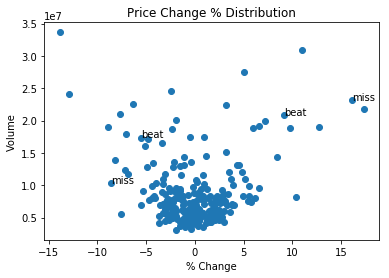

In [83]:
x = results['changePercent']
y = results['volume']
n = results['earnings_beat']
plt.scatter(x,y)

# Add 4 labels for the new_date column
#-q1 = [-4] new_date
#-q2 = [-3] new_date
#-q3 = [-2] new_date
#-q4 = [-1] new_date

for i, txt in enumerate(n):
    if txt == txt:
        plt.annotate(txt, (x[i], y[i]),color = 'black')  
plt.xlabel('% Change')
plt.ylabel('Volume')
plt.title('Price Change % Distribution')
plt.show()